# Name: Madison Gonsalves
# Roll no: 25 
# Class/Batch: Se Aiml / B-2
# Expt.-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [25]:
# Step 1 Part A: Data Preparation
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix 

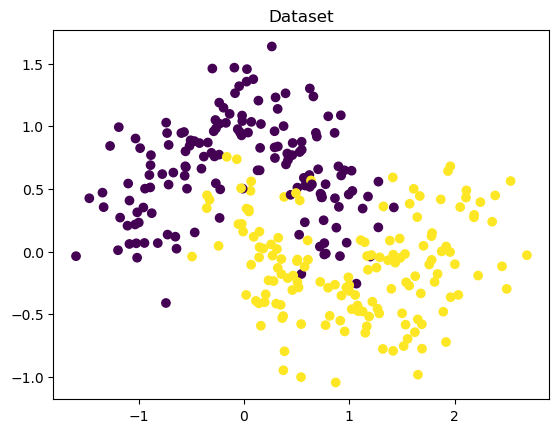

In [26]:
# Create 2D dataset
X,Y = make_moons(n_samples = 300, noise = 0.25, random_state = 42) 

plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Dataset") 
plt.show() 

#Train - test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size = 0.3, random_state = 0
) 

# Scaling (needed for LR and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Logistic Regression 
# Part B: Logistic Regression 
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression")
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print("Confusion matrix:\n", confusion_matrix(Y_test, Y_pred_lr)) 


Logistic Regression
Accuracy: 0.8777777777777778
Confusion matrix:
 [[34  5]
 [ 6 45]]


In [28]:
# Decision Tree 
# Part C: Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, Y_train)    # no scaling required 
Y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(Y_test, Y_pred_dt)) 
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt) )

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [29]:
# KNN
# Part D: KNN 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, Y_train)
Y_pred_knn = knn.predict(X_test_scaled)
print("KNN")
print("Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn) )

KNN
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


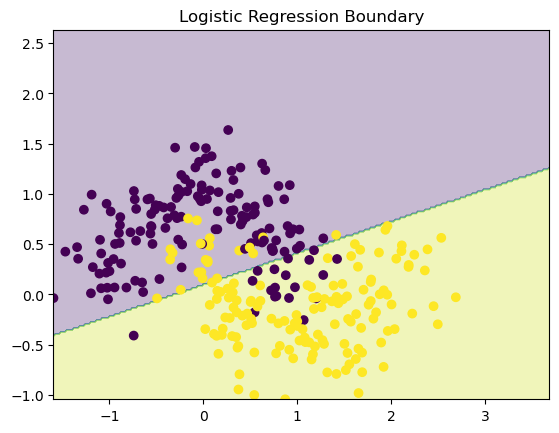

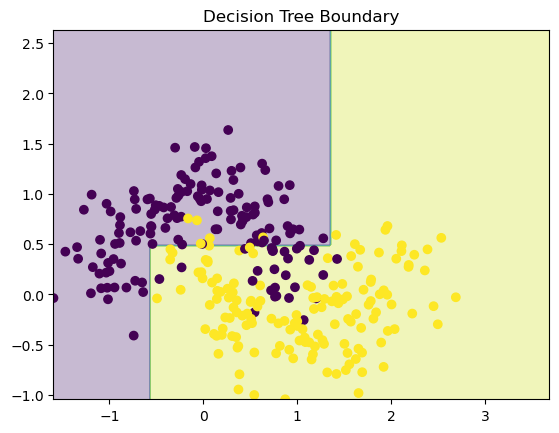

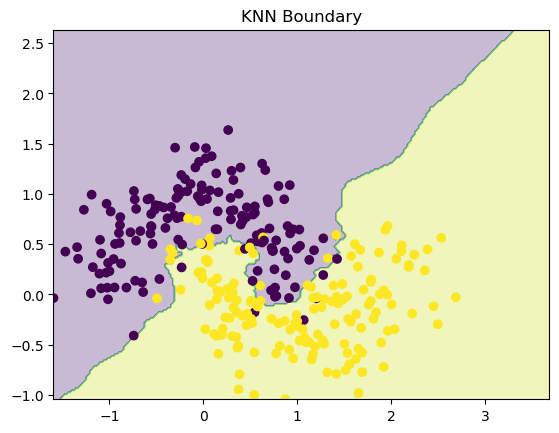

In [32]:
# Plotting boundry 
# Part E: Visualization 
def plot_boundary(model, scaled, title):
    h = 0.02 
    X_min, X_max = X[:,0].min(-1), X[:, 0].max()+1
    Y_min, Y_max = X[:,1].min(-1), X[:, 1].max()+1 
    XX, YY = np.meshgrid(np.arange(X_min, X_max, h),
                         np.arange(Y_min, Y_max, h)) 
    grid = np.c_[XX.ravel(), YY.ravel()] 
    if scaled:
        grid = scaler.transform(grid)
    Z = model.predict(grid)
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha = 0.3)
    plt.scatter(X[:, 0], X[:, 1], c= Y)
    plt.title(title)
    plt.show() 
plot_boundary(lr, True, "Logistic Regression Boundary")
plot_boundary(dt, False, "Decision Tree Boundary")
plot_boundary(knn, True, "KNN Boundary")